In [1]:
import pygame
import pygame.camera
from time import sleep
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage import morphology
from skimage.measure import label, regionprops
import matplotlib.patches as mpatches

pygame 2.0.0 (SDL 2.0.12, python 3.6.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [9]:
pygame.camera.init()
#print(pygame.camera.list_cameras()) #Camera detected or not
cam = pygame.camera.Camera("/dev/video0",(1920,1080))

In [3]:
def Grab_photo():
    cam.start()
    sleep(1)
    img = cam.get_image()
    pygame.image.save(img,"xxx.jpg")
    sleep(1)
    cam.stop()

    im = skimage.io.imread("xxx.jpg")
    cropped = im[150:850,200:1600]
    return cropped

In [4]:
def Image_parser(image):
    gray = skimage.color.rgb2gray(image)
    imgBin = gray < skimage.filters.threshold_otsu(gray)
    imgBin = morphology.closing(imgBin, np.ones(shape=(20,20)))
    boxes = BoxFounder(imgBin, image, Shower_Mode=False)
    image_list = CropImage(image, boxes)
    return image_list
    

In [5]:
def BoxFounder(imgBin, rescaled_image, Shower_Mode=False):
    label_image = label(imgBin)
    labeled_image = skimage.color.label2rgb(label_image, image= rescaled_image)
    if Shower_Mode:
        f, ax = plt.subplots(nrows=1, ncols=1)
    boxes = []
    for region in regionprops(label_image):
        if region.area > 50:
            minr, minc, maxr, maxc = region.bbox
            box = (minr, minc, maxr, maxc)
            boxes.append(box)
            if Shower_Mode:
                rect = mpatches.Rectangle((minc,minr), maxc-minc, maxr-minr, edgecolor="green", linewidth=2)
                ax.add_patch(rect)
    
    if Shower_Mode:
        ax.imshow(rescaled_image, cmap="gray")
    
    return boxes
    

In [6]:
def CropImage(rescaled_image, boxes):
    CroppedImages = []
    for box in boxes:
        minr, minc, maxr, maxc = box
        cropped_image = rescaled_image[minr:maxr+10,minc-10:maxc+10,:]
        CroppedImages.append(cropped_image)
    
    #for i,image in enumerate(CroppedImages):
    #    skimage.io.imsave("data/RGB/o_{}.jpg".format(i), image)
        
    #print(len(CroppedImages))
    return CroppedImages
    
        

In [7]:
def Grab_and_parse():
    img = Grab_photo()
    #img = skimage.io.imread("data/a10.jpg")
    img_list = Image_parser(img)
    resized_img = []
    for image in img_list:
        new_image = skimage.transform.resize(image, (299,299))
        resized_img.append(new_image)
        
    #f , ax = plt.subplots(nrows=1, ncols=len(img_list), figsize = (10,10))
    #for i, image in enumerate(img_list):
        #ax[i].imshow(image)
    print(resized_img[0].shape)
    return resized_img

In [10]:
liste = Grab_photo()

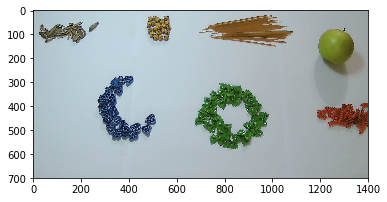

In [12]:
plt.imshow(liste)

In [21]:
skimage.io.imsave("xxx1.jpg",liste)